# Way Home

In [78]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Set Simulation Params and Create Grid

In [2]:
drunk_velocity = 1 # in m/s 
#car_velocitiy = 10 
car_intensitiy = 0.05 # probability that a car occurs on a lane 

# how many lanes has one direction? one lane is 1m
street_lanes = 2 
street_length = 50


In [3]:
def create_grid(street_lanes=2, street_length=50):
    street_width = 3 + 2*street_lanes 
    grid = np.zeros((street_width, street_length))

    # compute sideways - start and end row as well as between the directions
    sideways = [0, street_lanes+1, grid.shape[0]-1]
    for i in sideways:
        grid[i,] = 0.25

    # randomly place the person
    grid[0, random.randint(0, street_length)] = 1.0
    
    return grid, sideways

## _A_
- t=1=constant
- change in direction is always $\frac{1}{4}$ probability left, $\frac{1}{4}$ right, $\frac{1}{2}$ forward

### static cars
Cars do appear on a lane or not - velocity is not considered. If the drunk is on a lane where a car appears, he's dead.

In [66]:
def calc_direction_a(last_direction):
    
    # roll persons movement for A
    new_direction = last_direction
    p_dir = np.random.uniform(0,1,1)
    if p_dir < 0.25:
        new_direction -= 90
        #print("left")
    elif 0.25 <= p_dir < 0.5:
        new_direction += 90
        #print("right")
    #else:
        #print("forward")
        
    new_direction = new_direction%360 #modulo 
    dir_coords = (0,0)
    if new_direction == 90:
        dir_coords = (0,1)
    elif new_direction == 180:
        dir_coords = (1,0)
    elif new_direction == 270:
        dir_coords = (0,-1)
    elif new_direction == 0:
        dir_coords = (-1,0)
    
    return dir_coords, new_direction

In [113]:
def model_step(grid, sideways=[0,3,6],
               t_constant=True,
               drunk_velocity=1, drunk_direction=180,
               car_intensity=0.05, car_velocity=None,
               plot_progress=True,
               movement_type=calc_direction_a):
    """
        drunk_direction --  0 -> north
                            90 -> east
                            180 -> south
                            270 -> west
    """
    
    # get street length
    street_length = grid.shape[1]
    
    # safe grid layout for quick resets
    grid_layout = grid[:,0]
    
    # get persons coordinates
    y,x = np.unravel_index(grid.argmax(), grid.shape)
    
    hit = False
    finished = False
    
    direction_coords, new_direction = movement_type(drunk_direction)
    
    # make cars appear with probability car_intensity
    for lane in range(0, grid.shape[0]): 
        if lane not in sideways: 
            car_on_lane = (np.random.uniform(0,1,1) < car_intensity).item()
            if car_on_lane:
                grid[lane,] = 0.6
            if not car_on_lane:
                grid[lane,] = 0
    
    #print(y+direction[0], x+direction[1],grid[y+direction[0], x+direction[1]])
    
    ## if we are too far right/left we end up on the other side -> modulo
    ## if we are on the start row and we would go deeper into negative space, we do not move at all
    grid[max(y+direction_coords[0],0), (x+direction_coords[1])%street_length] = 1.0  
    grid[y, x] = grid_layout[y] # reset old coordinate
    
    # compute hit
    #vals, cnts = np.unique(grid[1,:], return_counts=True)
    #print(vals[cnts.argmax()])
    if grid[y+direction_coords[0], (x+direction_coords[1]+1)%street_length] == 0.6: 
        hit = True
    
    # if the last row is reached, the drunk survived
    if y+direction_coords[0] == grid.shape[0]-1:
        finished = True
    
    if plot_progress:
        plt.figure(figsize=(12,4))
        sns.heatmap(grid, cmap="viridis_r", linewidths=.05, vmin=0, vmax=1)
        plt.title("Grid Steps")
    
    return grid, new_direction, hit, finished

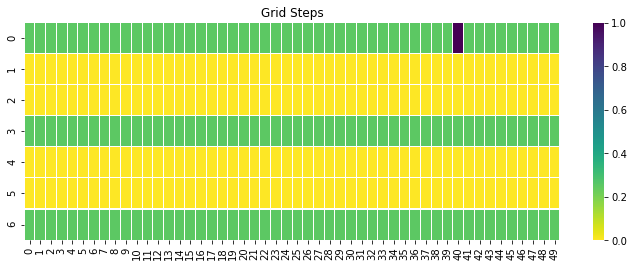

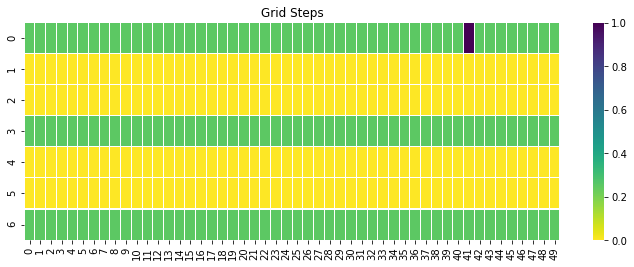

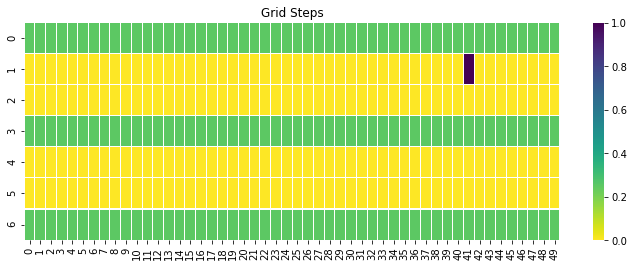

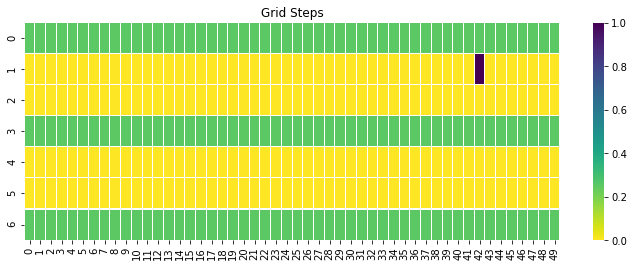

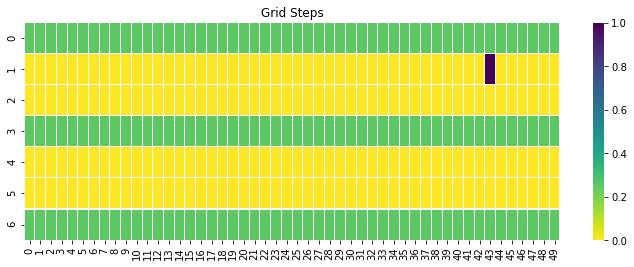

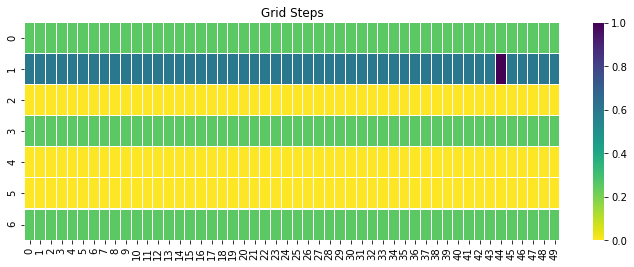

In [72]:
grid, sideways = create_grid(street_lanes, street_length)
"""plt.figure(figsize=(12,4))
p = sns.heatmap(grid, cmap="viridis_r", linewidths=.05, vmin=0, vmax=1)
plt.title("Initial Grid")"""

hit = False
fin = False
new_dir=180
while hit != True and fin != True:
    #print(new_dir)
    g, new_dir, hit, fin = model_step(grid, sideways, drunk_direction=new_dir, car_intensity=0.05)

## _B_
- t=1=constant
- new direction = old direction +$\alpha$ with $\alpha$ is uniformly distributed in $[-2/3\pi; +2/3\pi]$

In [114]:
def calc_direction_b(last_direction):
    
    # roll persons movement for B
    
    # -(2/3)*math.pi, +(2/3)*math.pi --> -120°,120°
    new_direction = last_direction + np.random.uniform(-120, 120, 1)
        
    new_direction = new_direction%360 #modulo 
    dir_coords = (0,0)
    
    if 337.5 <= new_direction < 22.5:
        dir_coords = (-1,0)
    elif 22.5 <= new_direction < 67.5:
        dir_coords = (-1,1)
    elif 67.5 <= new_direction < 112.5:
        dir_coords = (0,1)
    elif 112.5 <= new_direction < 157.5:
        dir_coords = (1,1)
    elif 157.5 <= new_direction < 202.5:
        dir_coords = (1,0)
    elif 202.5 <= new_direction < 247.5:
        dir_coords = (1,-1)
    elif 247.5 <= new_direction < 292.5:
        dir_coords = (0,-1) 
    elif 292.5 <= new_direction < 337.5:
        dir_coords = (-1,-1)
    
    return dir_coords, new_direction

<ipython-input-113-dbabbde750ed>:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))


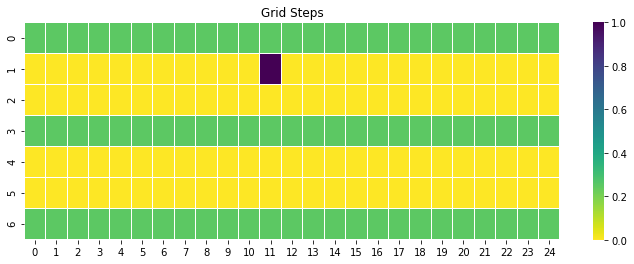

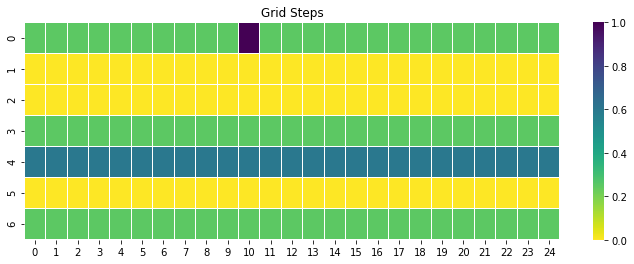

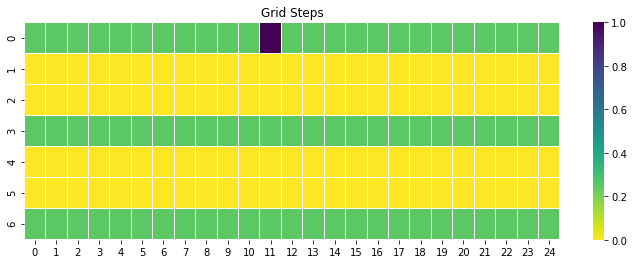

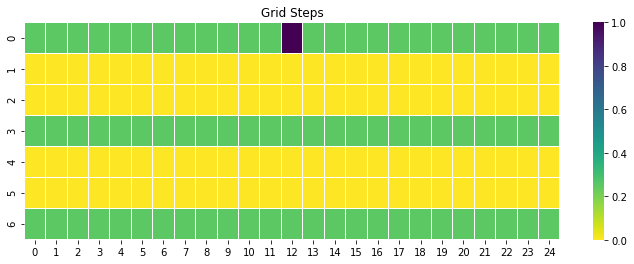

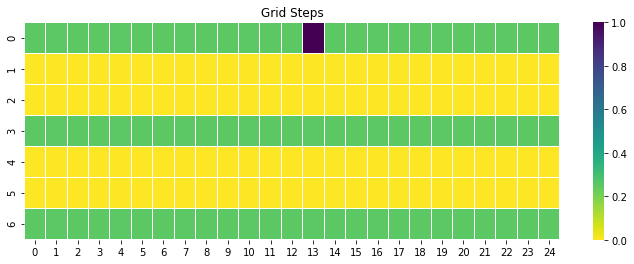

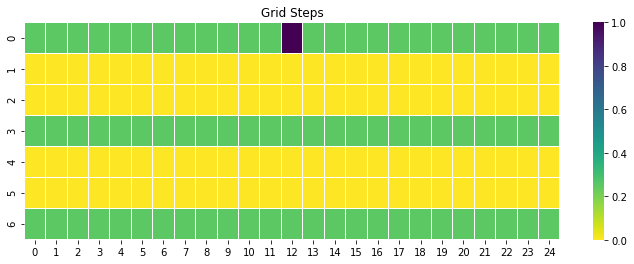

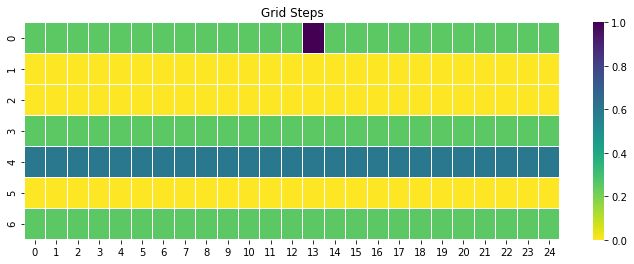

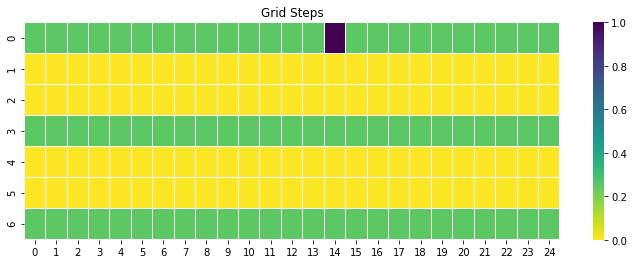

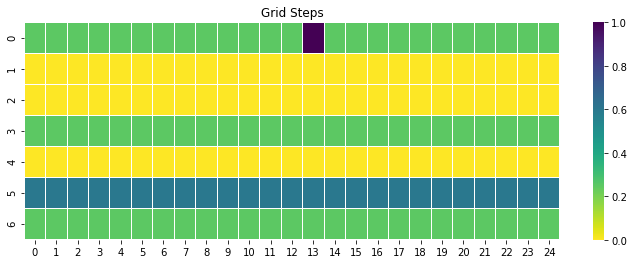

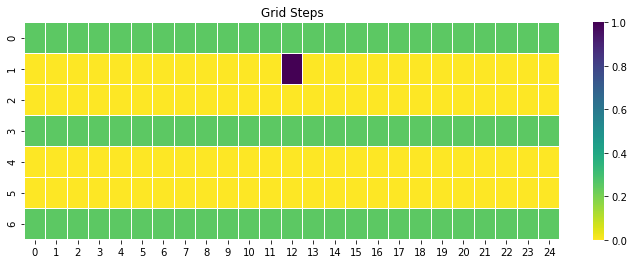

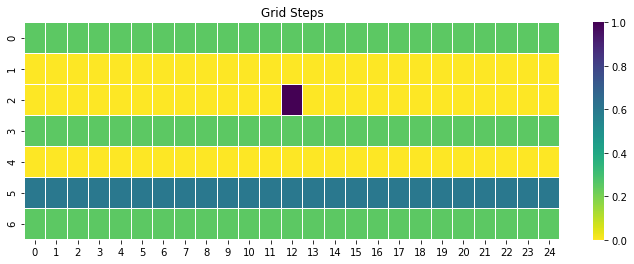

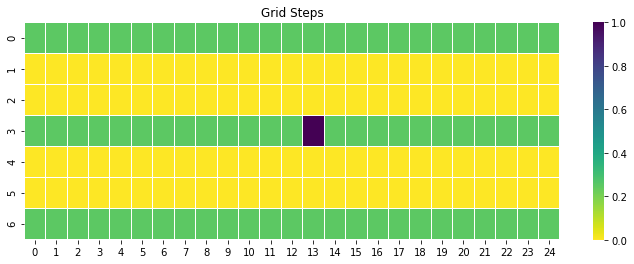

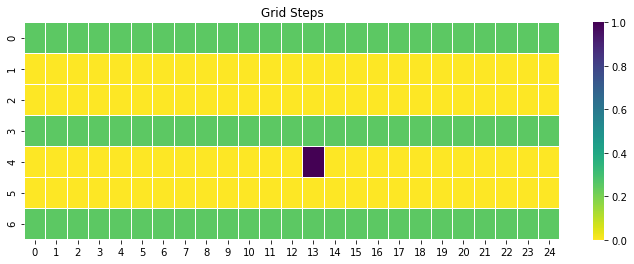

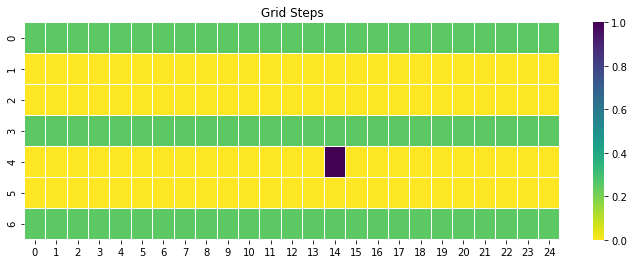

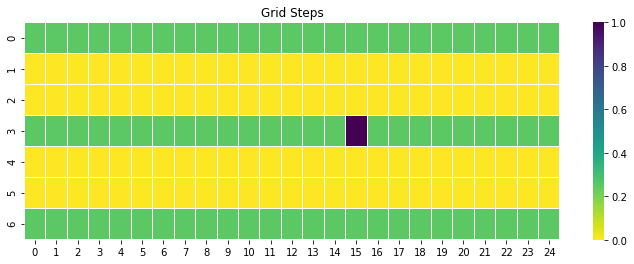

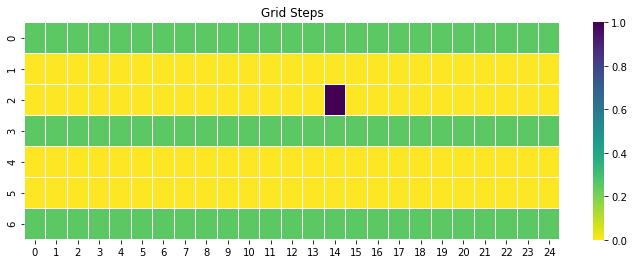

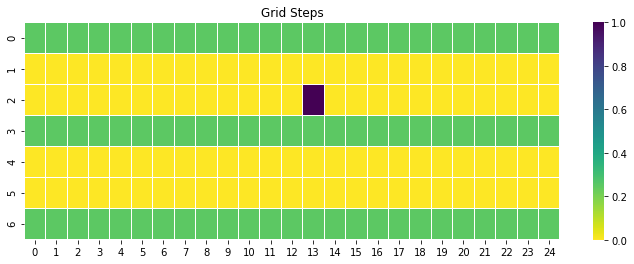

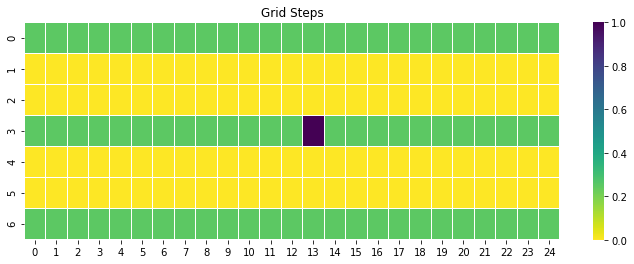

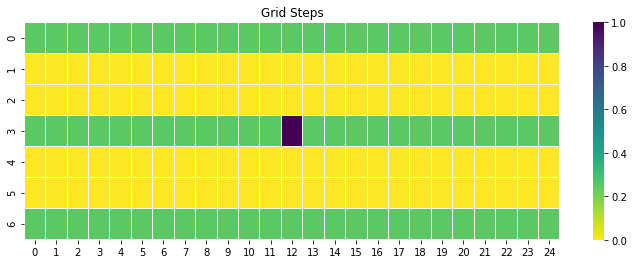

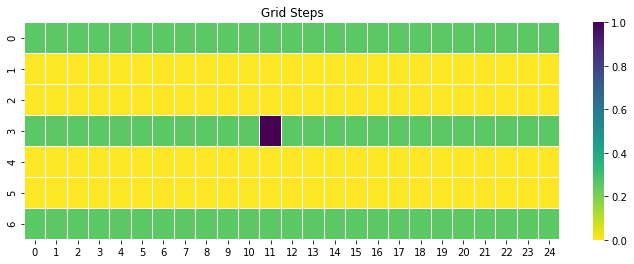

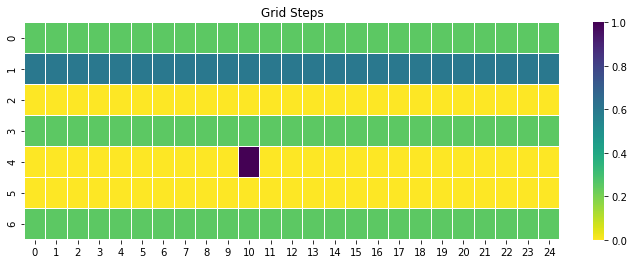

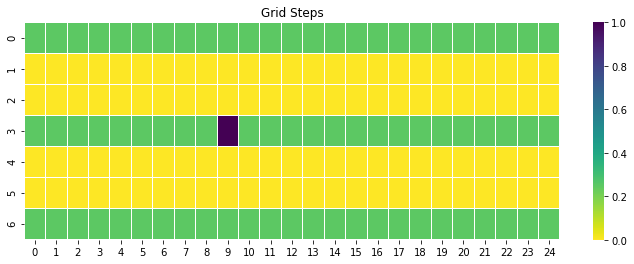

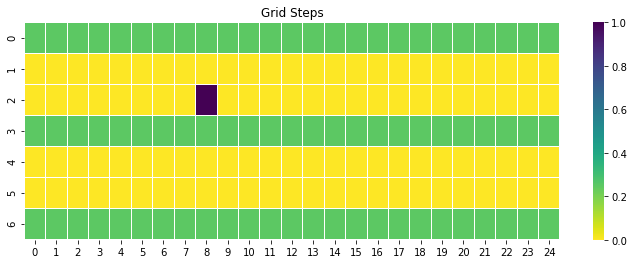

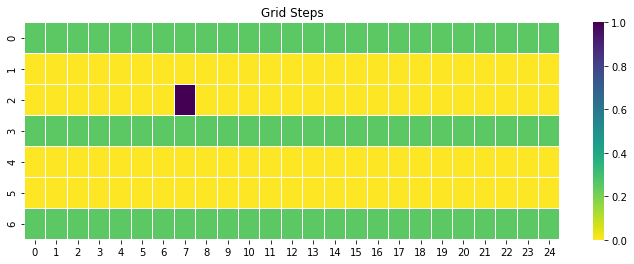

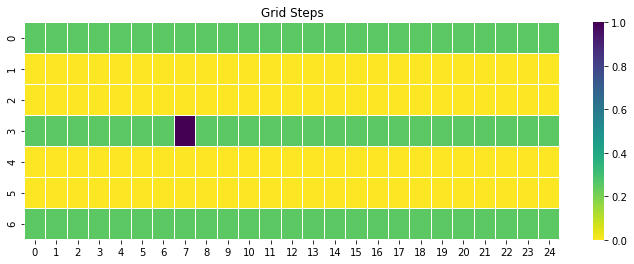

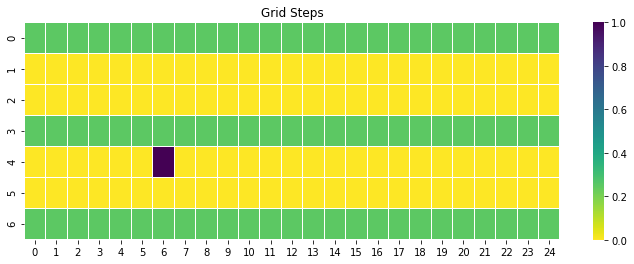

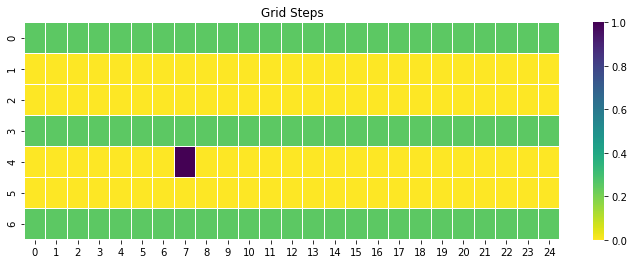

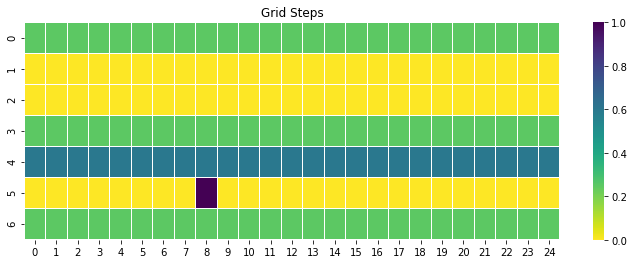

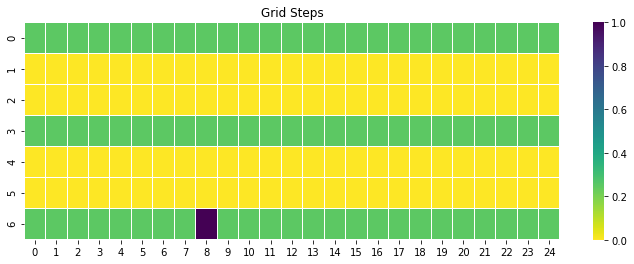

In [116]:
grid, sideways = create_grid(street_lanes=2, street_length=25)
"""plt.figure(figsize=(12,4))
p = sns.heatmap(grid, cmap="viridis_r", linewidths=.05, vmin=0, vmax=1)
plt.title("Initial Grid")"""

hit = False
fin = False
new_dir=180
while hit != True and fin != True:
    #print(new_dir)
    g, new_dir, hit, fin = model_step(grid, sideways, drunk_direction=new_dir, car_intensity=0.05, movement_type=calc_direction_b)

## C
-  t is exponentially distributed with intensity 1/time unit
- new direction = old direction +$\alpha$ with $\alpha$ is uniformly distributed in $[-2/3\pi; +2/3\pi]$